In [2]:
import sys
import seaborn as sns
import os
import glob
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import plot as pltfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn
import pandas as pd

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload
     
# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

## AVALANCHE SIZE, DURATION 
* avalanche size and duration distributions are log-linear

In [4]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

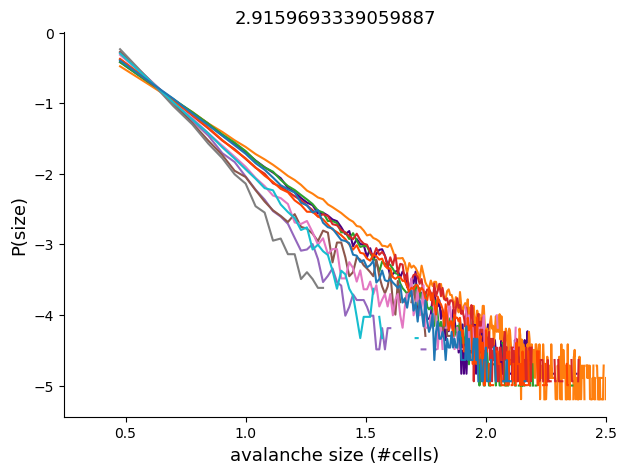

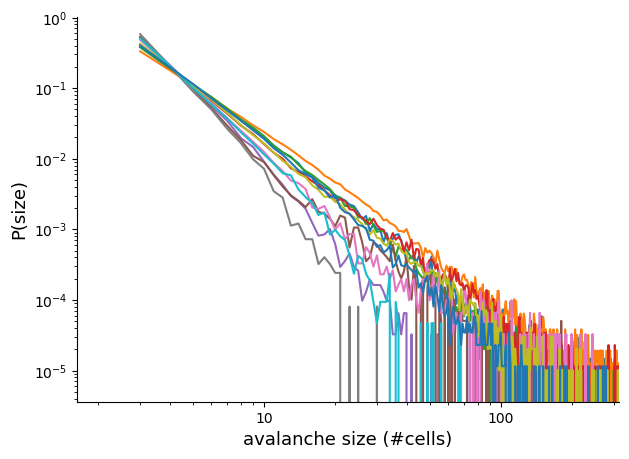

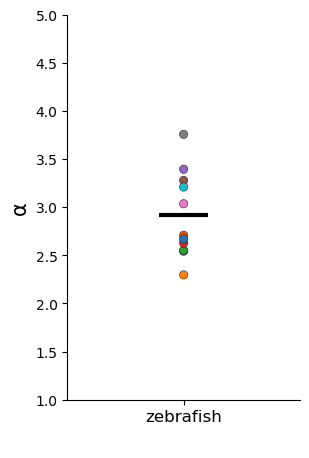

In [5]:
import matplotlib
fig, axarr = plt.subplots(figsize = (7,5))
sns.reset_orig()
#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(size_powlist)):
    blnexp = np.append(blnexp, np.load(size_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)


colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_title(str(np.mean(blnexp)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 2.5)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, np.load(blnlist[i])[0])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = np.load(blnlist[i])[0]
    binned=np.linspace(mini,maxi, 675000)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 316)  
axarr.set_ylabel('P(size)', size = '13')
axarr.set_xlabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/dominicburrows/anaconda3/li

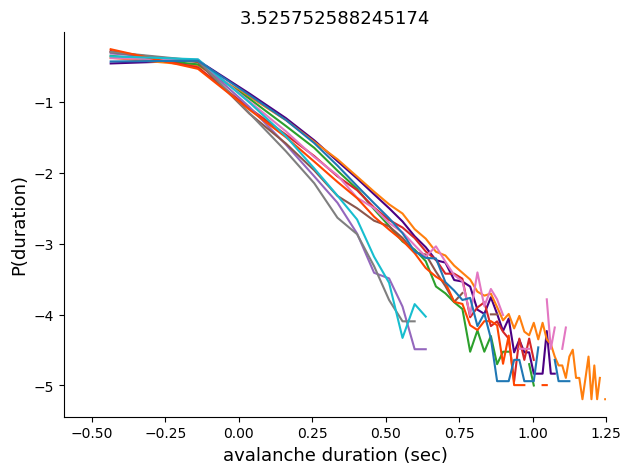

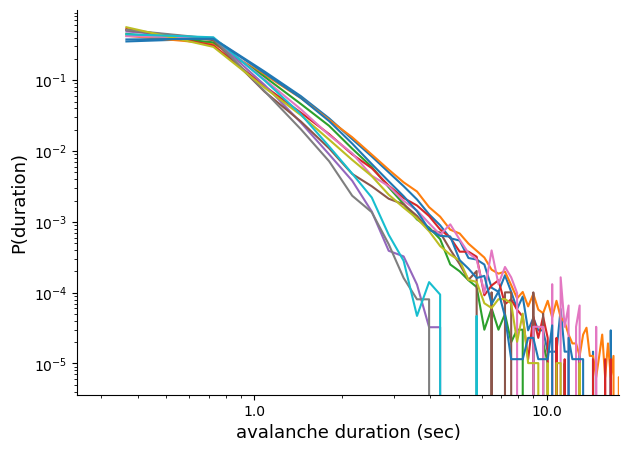

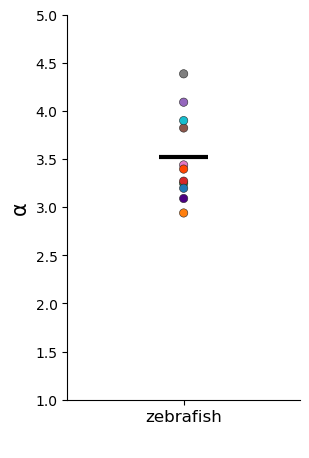

In [6]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sns.reset_orig()

#EXPONENT CALCULATION - Baseline append
blnexp = []
for e in range(len(dur_powlist)):
    blnexp = np.append(blnexp, np.load(dur_powlist[e], allow_pickle=True)[0])
#Make fish name list
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": blnexp, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)


binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = np.log10(hist[1][:-1])
    yaxis = np.log10(hist[0]/np.sum(hist[0]))
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(blnexp)), size = '13')
plt.xlim(right = 1.25)  
plt.show()

fig, axarr = plt.subplots(figsize = (7,5))
binvec = []
for i in range(len(blnlist)):
    binvec = np.append(binvec, (1/2.73)*np.load(blnlist[i])[1])
mini = np.min(binvec)
maxi = np.max(binvec)
for i in range(len(blnlist)):
    avdistcut = (1/2.73)*np.load(blnlist[i])[1]
    binned=np.linspace(mini,maxi, 2500)
    hist = np.histogram(avdistcut, bins = binned)
    xaxis = hist[1][:-1]
    yaxis = hist[0]/np.sum(hist[0])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, markersize = 1, alpha = 1)
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.xlim(right = 17.7)  
axarr.set_ylabel('P(duration)', size = '13')
axarr.set_xlabel('avalanche duration (sec)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()


#PLot exponent
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.003 ,0.003, linestyle = '-', color = 'k', lw=3)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(1,5)
plt.show()

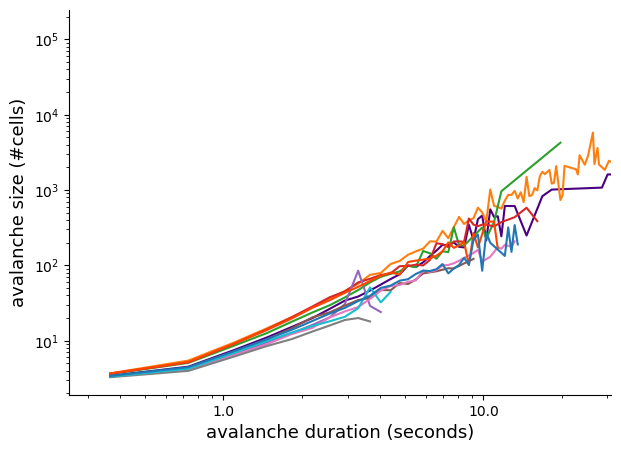

In [7]:
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('avalanche duration (seconds)', size = '13')
axarr.set_ylabel('avalanche size (#cells)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.xlim(right = 31)  
plt.show()

### Power law quantification
* duration and size of avalanches are better explained by power laws than lognormal

In [8]:
# PLOT - average whole brain fluorescence
#----------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
size_powlist = sorted(glob.glob('*BLN*size*_power*'))
size_loglist = sorted(glob.glob('*BLN*size*_log*'))
dur_powlist = sorted(glob.glob('*BLN*dur*_power*'))
dur_loglist = sorted(glob.glob('*BLN*dur*_log*'))
size_powlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_size_marglik_power.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_size_marglik_power.npy']

In [9]:
#LOGLIK RATIO
size_list, dur_list = np.zeros(11), np.zeros(11)
for i in range(len(size_powlist)):
    size_list[i] =  np.load(size_powlist[i],allow_pickle=True)[1] - np.load(size_loglist[i],allow_pickle=True)[2]
    dur_list[i] = np.load(dur_powlist[i],allow_pickle=True)[1] - np.load(dur_loglist[i],allow_pickle=True)[2]
fli = list(range(11))
for i in range(11):
    fli[i] = 'F' + str(i+2)
llr_df = pd.DataFrame({"LLR":np.append(size_list, dur_list) ,"Fish": np.append(fli,fli), "Labels": np.append(adfn.repeat_list('Size', 11), adfn.repeat_list('Duration', 11))})

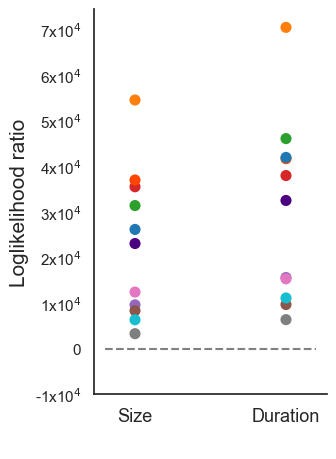

In [10]:


sns.set(style="white")
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="Labels", y="LLR", data=llr_df, hue = 'Fish', palette = colors, size = 8, jitter = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(bottom = -10000)  
ax.set_ylabel('Loglikelihood ratio', size = '15')
ax.set_yticklabels(['-1x10$^{4}$','0','1x10$^{4}$', '2x10$^{4}$', '3x10$^{4}$', '4x10$^{4}$', '5x10$^{4}$', '6x10$^{4}$','7x10$^{4}$'])
ax.set_xticklabels(['Size', 'Duration'], size = 13)
plt.hlines(1, -0.2 ,1.2, linestyle = '--', color = 'grey')
ax.set_xlabel(' ', size = '13')
ax.legend_.remove()
plt.show()

# Connectivity-distance
* np.corrcoeff function for entire matrix 
* bin data on linear scale 
* ignore negative correlations
* exponent match theory

In [11]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
tracelist = sorted(glob.glob('*BLN*cut*realtrace*')) 
coordlist = sorted(glob.glob('*BLN*realcoord*')) 
distlist = sorted(glob.glob('*BLN*dist.npy*')) 
binlist = sorted(glob.glob('*BLN*_corrdist*'))
binlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_corrdist_bins.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_corrdist_bins.npy']

In [ ]:
#Calculate euclidean distance
#for e in range(len(coordlist)):
#    euc_mat = crfn.euclidean_mat(np.load(coordlist[e]), [.5, .5, 15])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, coordlist) + '_' + 'dist.npy', mat)
#    print('Done fish #' + str(e))

In [ ]:
#Calculate corr-dist binning
#for e in range(len(distlist)):
#    corr = np.corrcoef(np.load(tracelist[e]))
#    np.save(savepath + adfn.save_name(e,tracelist) + '_' + 'corr.npy', corr)
#    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[e]), distlist[e], 200)
#    np.save(savepath + adfn.save_name(e,distlist) + '_' + 'corrdist_bins.npy', corrdistbin)

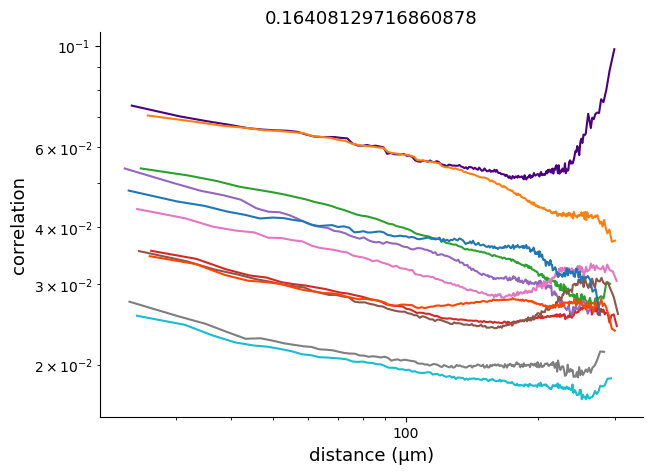

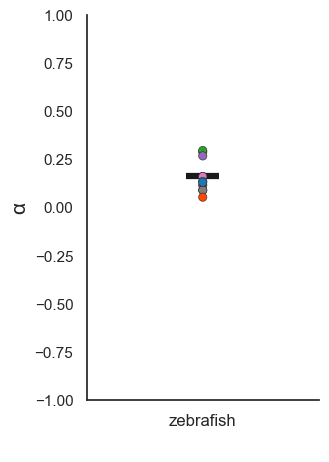

In [12]:
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
slope = list(range(len(binlist)))
for i in range(len(binlist)):
    xaxis = np.load(binlist[i])[0]
    yaxis = np.load(binlist[i])[1]
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('distance (μm)', size = '13')
axarr.set_xticklabels(['100', '100', '100', '100'])
axarr.set_ylabel('correlation', size = '13')
axarr.set_title(str(np.mean(slope)), size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(-1,1)
plt.show()

# Eigenspectrum
* Baseline PCA variance plots - exponent calculation
* behaviour PCA variance

In [13]:
# Create lists of trace data
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnpcv = sorted(glob.glob('*BLN*pcavar.npy'))
blnpcv

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_pcavar.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_pcavar.npy']

In [ ]:
#Calculate entire trace PC-variance
#blnpcv, p20pcv = list(range(len(blnraw))),list(range(len(p20raw)))
#for e in range(len(blnraw)):
#    b_data, p_data = np.load(blnraw[e]), np.load(p20raw[e])
#    n_components = b_data.shape[1]
#    b_pca, p_pca = decomposition.PCA(n_components) ,decomposition.PCA(n_components) #Define decomposition
#    b_fit, p_fit = b_pca.fit(b_data) ,p_pca.fit(p_data) 
#    blnpcv[e], p20pcv[e] = b_fit.explained_variance_ratio_, p_fit.explained_variance_ratio_
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, blnraw) + '_' + 'pcavar.npy', blnpcv[e])
#    np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.save_name(e, p20raw)  + '_' + 'pcavar.npy', p20pcv[e])
#    print('Saved fish #' + str(e))

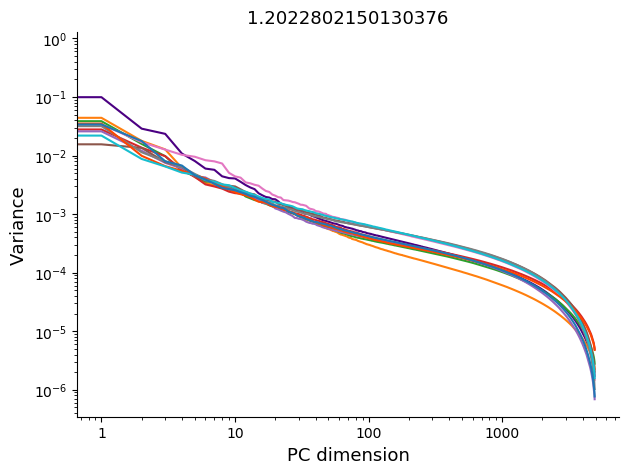

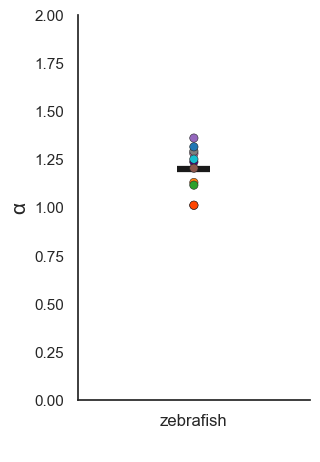

In [14]:
sns.reset_orig()
fig, axarr = plt.subplots(figsize = (7,5))
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
axarr.set_prop_cycle('color', colors)
slope = list(range(len(blnpcv)))
for i in range(len(blnpcv)):
    xaxis = np.linspace(0,np.shape(np.load(blnpcv[i]))[0], num = np.shape(np.load(blnpcv[i]))[0]+1)
    yaxis = np.load(blnpcv[i])
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1, c = colors[i])
    slope[i] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:]),np.log10(yaxis[:len(xaxis)-1][1:]))[0]
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_ylabel('Variance', size = '13')
axarr.set_xlabel('PC dimension', size = '13')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
axarr.set_title(str(np.mean(slope)), size = '13')
plt.show()

import matplotlib 
import seaborn as sns
import pandas as pd

fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

slopedic = {
  "α": slope, "Fish": fli,  "condition": adfn.repeat_list('baseline',11)}
slopedf = pd.DataFrame(slopedic)

colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")

fig, ax = plt.subplots(figsize = (3,5))

ax = sns.stripplot(x="condition", y="α", data=slopedf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
plt.hlines(np.mean(slopedf['α']), -0.002 ,0.002, linestyle = '-', color = 'k', lw=4.5)
ax.set_ylabel('α', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
ax.legend_.remove()
plt.ylim(0,2)
plt.show()


# Branching ratio
* branching ratio is close to critical value (1)

In [17]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnbranchlist = sorted(glob.glob('*BLN*_branch*'))
p5branchlist = sorted(glob.glob('*PTZ05*_branch*'))
p20branchlist = sorted(glob.glob('*PTZ20*_branch*'))
blnbranchlist

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-03_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01__branch.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09__branch.npy']

In [18]:
import pandas as pd
all_list = [blnbranchlist]
blist = adfn.list_of_list(1,0)
for t in range(len(blist)):
    for i in range(len(blnbranchlist)):
        blist[t] = np.append(blist[t], np.load(all_list[t][i]))
fli=list(range(11))      
for i in range(11):
    fli[i] = 'F' + str(i+2)

branchdic = {
  "branch ratio": blist[0], "condition": adfn.repeat_list('baseline',11), "Fish": fli}
branchdf = pd.DataFrame(branchdic)
branchdf

,branch ratio,condition,Fish
0,0.986667,baseline,F2
1,1.089033,baseline,F3
2,1.020179,baseline,F4
3,1.033049,baseline,F5
4,0.838542,baseline,F6
5,0.883468,baseline,F7
6,0.906975,baseline,F8
7,0.797831,baseline,F9
8,1.017794,baseline,F10
9,0.862305,baseline,F11


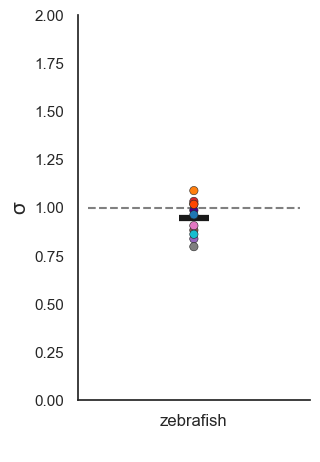

In [19]:
import matplotlib 
import seaborn as sns
colors = ['indigo', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 'orangered', '#17becf', '#1f77b4']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (3,5))
ax = sns.stripplot(x="condition", y="branch ratio", data=branchdf, hue = 'Fish',palette = colors, linewidth = 0.4, jitter = False, size = 6, alpha = 1)
#ax = sns.pointplot(x="condition", y="branch ratio", data=branchdf, color = 'black', linestyles = ["--"])
plt.hlines(np.mean(branchdf['branch ratio']), -0.007 ,0.007, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.05 ,0.05, linestyle = '--', color = 'grey')
ax.set_ylabel('σ', size = '15')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_xticklabels(['zebrafish'], size = 12)
plt.ylim(0,2)
ax.legend_.remove()
plt.show()